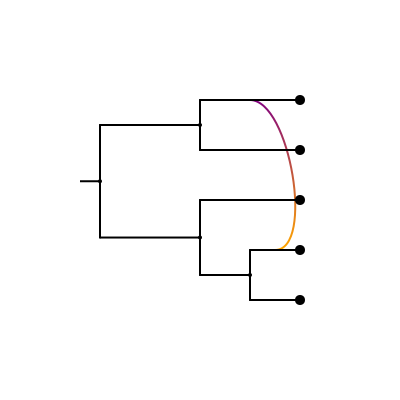

In [2]:
import ete3
import phylustrator as ph

# 1. Create a tiny symmetric tree (5 leaves)
# Structure: ((1,2),(3,(4,5)));
t = ete3.Tree("((1:1,2:1)n7:1,(3:1,(4:0.5,5:0.5)n9:0.5)n8:1)Root;", format=1)

# 2. Give every internal node a name if it doesn't have one
# (Phylustrator uses names to find nodes)
for i, node in enumerate(t.traverse()):
    if not node.name:
        node.name = f"internal_{i}"


# 3. Define ONE clear transfer
# From leaf '1' to leaf '4'
# Since we are debugging undated AleRax style, time is None
debug_transfers = [
    {'from': '1', 'to': '4', 'freq': 1, 'time': None}
]

# 4. Initialize Drawer
style = ph.TreeStyle(width=400, height=400, branch_size=2)


v_drawer = ph.VerticalTreeDrawer(t, style=style)

# Test with midpoint mode and thickness weighting
v_drawer.plot_transfers(
    debug_transfers, 
    mode="midpoint", 
    filter_below=0.04, 
    arc_intensity=40,
    use_thickness=False, 
    stroke_width=2,
    use_gradient=True,
    color="black",
    opacity = 1,
)

v_drawer.draw()


# Display
v_drawer.d

In [8]:
# --- DEBUG PRINT BLOCK ---
name2node = {n.name: n for n in t.traverse()}
src_name = '1'
dst_name = '4'

src = name2node.get(src_name)
dst = name2node.get(dst_name)

if src and dst:
    print(f"Source Node '{src_name}' found at: {src.coordinates}")
    print(f"Target Node '{dst_name}' found at: {dst.coordinates}")
    
    # Calculate what the transfer coordinates should be
    src_px = src.up.coordinates[0] if src.up else src.coordinates[0] - 20
    x_start = (src_px + src.coordinates[0]) / 2
    print(f"Calculated Transfer Start X: {x_start}")
else:
    print(f"ERROR: Could not find nodes '{src_name}' or '{dst_name}' in the tree!")
    print(f"Available names: {list(name2node.keys())}")

Source Node '1' found at: (100.0, -150.0)
Target Node '4' found at: (100.0, 30.0)
Calculated Transfer Start X: 37.5


In [6]:
# 1. Create Marker
marker = draw.Marker(9, 5, 2, 2, scale=2, orient="auto")
marker.append(draw.Path("M 0 0 L 10 5 L 0 10 z", fill=color))

# 2. Add marker to the drawing FIRST
self.d.append(marker) 

# 3. Create Path and reference the marker
path = draw.Path(...)
path.args['marker_end'] = marker # Reference the object
self.d.append(path)

NameError: name 'draw' is not defined